<a href="https://colab.research.google.com/github/head4ths/CEI/blob/master/(WM)_Macro_Release_and_Market_Patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. FRED, FOMC 발표와 Yahoo Finance API를 이용한 매크로 이벤트 분석

FRED에서 API 사용을 위한 Key가 필요합니다. 관련하여 FRED에 가입하고 관련한 Key를 발급받습니다.
https://fred.stlouisfed.org/docs/api/api_key.html

## 1.1 FRED 데이터 사용을 위한 Library 설치

In [ ]:
!pip install pyfredapi Fedtools yfinance

## 1.2 FRED에서 매크로 지표 발표일 데이터 가지고 오기

In [ ]:
import pyfredapi as pf

api_key = '2f1251d60ba91ebf830cfd41345dcfd2'

# [CPIAUCSL] Consumer Price Index for All Urban Consumers: All Items in U.S. City Average
# [A191RL1Q225SBEA] Real Gross Domestic Product:
# [INDPRO] Industrial Production: Total Index
# [UNRATE] Unemployment Rate
# [PAYEMS] All Employees, Total Nonfarm
# [FEDTARRMLR]


data = pf.get_series_initial_release("CPIAUCSL", api_key=api_key)
release_dates = data['realtime_start'].values
test_dates = release_dates[-12*10:]

print (test_dates)

['2013-10-30' '2013-11-20' '2013-12-17' '2014-01-16' '2014-02-20'
 '2014-03-18' '2014-04-15' '2014-05-15' '2014-06-17' '2014-07-22'
 '2014-08-19' '2014-09-17' '2014-10-22' '2014-11-20' '2014-12-17'
 '2015-01-16' '2015-02-26' '2015-03-24' '2015-04-17' '2015-05-22'
 '2015-06-18' '2015-07-17' '2015-08-19' '2015-09-16' '2015-10-15'
 '2015-11-17' '2015-12-15' '2016-01-20' '2016-02-19' '2016-03-16'
 '2016-04-14' '2016-05-17' '2016-06-16' '2016-07-15' '2016-08-16'
 '2016-09-16' '2016-10-18' '2016-11-17' '2016-12-15' '2017-01-18'
 '2017-02-15' '2017-03-15' '2017-04-14' '2017-05-12' '2017-06-14'
 '2017-07-14' '2017-08-11' '2017-09-14' '2017-10-13' '2017-11-15'
 '2017-12-13' '2018-01-12' '2018-02-14' '2018-03-13' '2018-04-11'
 '2018-05-10' '2018-06-12' '2018-07-12' '2018-08-10' '2018-09-13'
 '2018-10-11' '2018-11-14' '2018-12-12' '2019-01-11' '2019-02-13'
 '2019-03-12' '2019-04-10' '2019-05-10' '2019-06-12' '2019-07-11'
 '2019-08-13' '2019-09-12' '2019-10-10' '2019-11-13' '2019-12-11'
 '2020-01-

## 1.3 FOMC 발표일자 가지고 오기

In [ ]:
from FedTools import MonetaryPolicyCommittee

monetary_policy = MonetaryPolicyCommittee(
            main_url = 'https://www.federalreserve.gov',
            calendar_url = 'https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm',
            start_year = 1994,
            historical_split = 2014,
            verbose = True,
            thread_num = 10)

data = monetary_policy.find_statements()
release_dates = data.index.strftime ("%Y-%m-%d").values

test_dates = release_dates[-8*10:]

print (test_dates)

Constructing links between 1994 and 2023
Extracting the past 201 FOMC Statements.
Retrieving articles.
.........................................................................................................................................................................................................['2011-08-09' '2011-09-21' '2011-11-02' '2011-12-13' '2012-01-25'
 '2012-03-13' '2012-04-25' '2012-06-20' '2012-08-01' '2012-09-13'
 '2012-10-24' '2012-12-12' '2013-01-30' '2013-03-20' '2013-05-01'
 '2013-06-19' '2013-07-31' '2013-09-18' '2013-10-30' '2013-12-18'
 '2014-01-29' '2014-03-19' '2014-04-30' '2014-06-18' '2014-07-30'
 '2014-09-17' '2014-10-29' '2014-12-17' '2018-01-31' '2018-03-21'
 '2018-05-02' '2018-06-13' '2018-08-01' '2018-09-26' '2018-11-08'
 '2018-12-19' '2019-01-30' '2019-03-20' '2019-05-01' '2019-06-19'
 '2019-07-31' '2019-09-18' '2019-10-11' '2019-10-30' '2019-12-11'
 '2020-01-29' '2020-03-03' '2020-03-15' '2020-03-23' '2020-03-31'
 '2020-04-29' '2020-06-10' '2020-07-

## 1.4 경제 지표 발표일을 전후로 주가 패턴 분석

[*********************100%%**********************]  1 of 1 completed


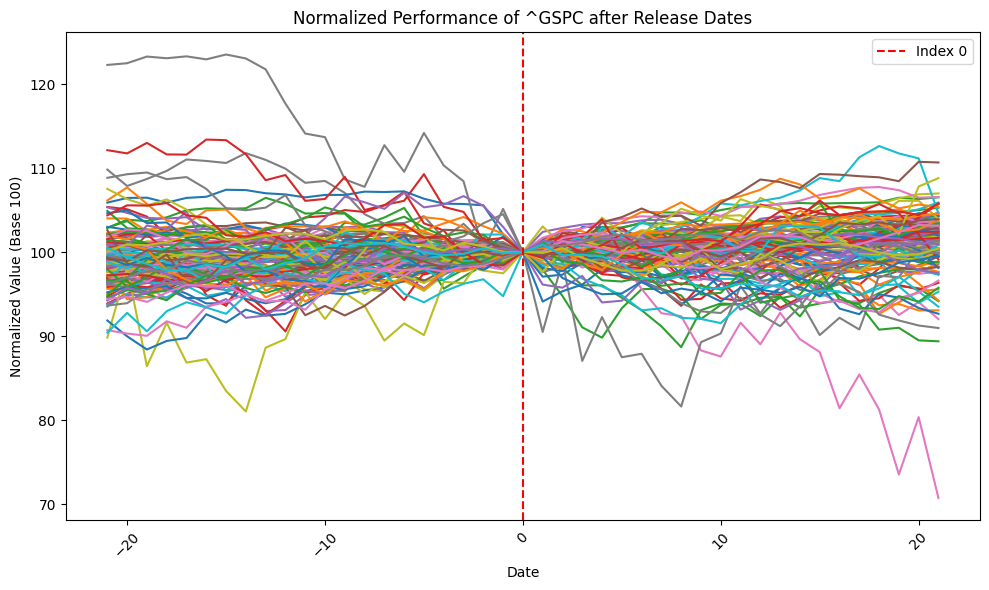

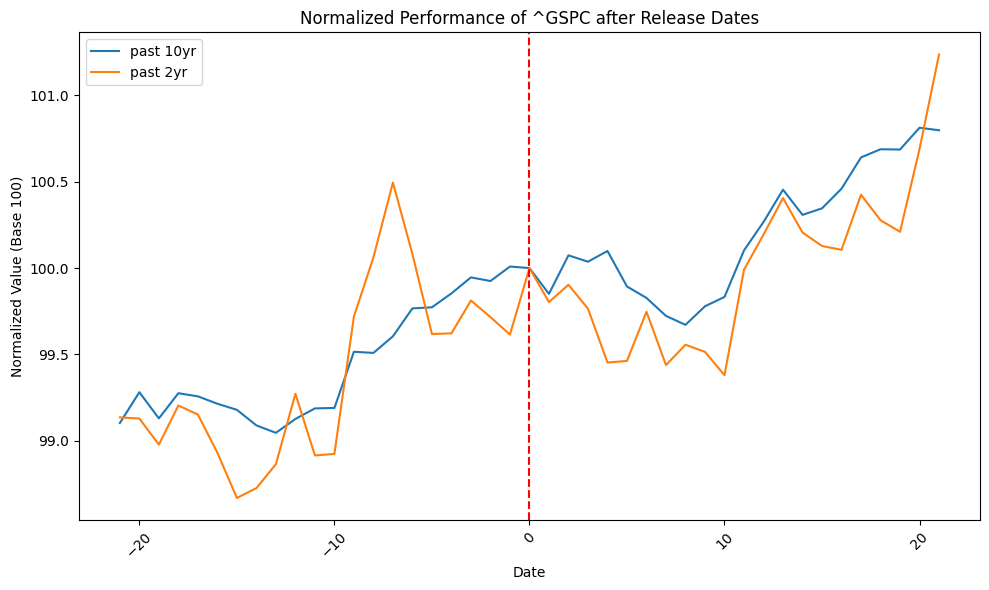

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd

wnd_length = 21

def plot_normalized_performance(release_date_list, ticker='^GSPC'):

  data = yf.download(ticker, start=datetime.datetime(1990, 1, 1), end=datetime.datetime(2023, 12, 31))

  # Specify the target date
  plt.figure(figsize=(10, 6))

  samples = []

  for target_date in release_date_list:

    # Find the next available date in the DataFrame
    target_date = data.index[data.index >= target_date][0]
    target_index = data.index.get_loc(target_date)

    # Extract rows before and after the target date
    start_index = target_index - wnd_length
    end_index = target_index + wnd_length
    selected_data = data.iloc[start_index:end_index + 1]['Adj Close']/data.iloc[target_index]['Adj Close']*100
    samples.append(selected_data.values)

    #plt.plot(range(-7,7+1), selected_data, label=f"Release Date: {target_date}")
    plt.plot(range(-wnd_length,len(selected_data)-wnd_length), selected_data)

  result = pd.DataFrame(samples, index=release_date_list)

  plt.axvline(x=0, color='red', linestyle='--', label='Index 0')

  plt.title("Normalized Performance of %s after Release Dates" %ticker)
  plt.xlabel('Date')
  plt.ylabel('Normalized Value (Base 100)')
  plt.legend()
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

  return result

ticker = "^GSPC" # @param {type:"string"}

rpt = plot_normalized_performance(test_dates, ticker)

plt.figure(figsize=(10, 6))
plt.plot(range(-wnd_length,wnd_length+1), rpt.tail(8*10).mean(), label='past 10yr')
plt.plot(range(-wnd_length,wnd_length+1), rpt.tail(8*2).mean(), label='past 2yr')
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Normalized Performance of %s after Release Dates" %ticker)
plt.xlabel('Date')
plt.ylabel('Normalized Value (Base 100)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. 금융 자산의 계절성(Seasonality) 패턴 분석

시장을 이긴 지수들(ETF)

*   MGK (Vanguard Mega Cap Growth ETF)
*   NOBL (ProShares S&P500 Dividend Aristocrats ETF)
*   SCHD (Schwab U.S. Dividend Equity ETF)
*   QDIV (Global X S&P500 Quality Dividend ETF)
*   SPGP (Invesco S&P500 GARP ETF)
*   COWZ (Pacer US Cash Cows 100 ETF)
*   MOAT (VanEck Vectors Morningstar Wide Moat ETF)
*   PKW (Invesco Buyback Achievers ETF)
*   HAPI (Global X SuperDividend REIT ETF)

##2.1 월중 일자변 패턴

[*********************100%%**********************]  1 of 1 completed


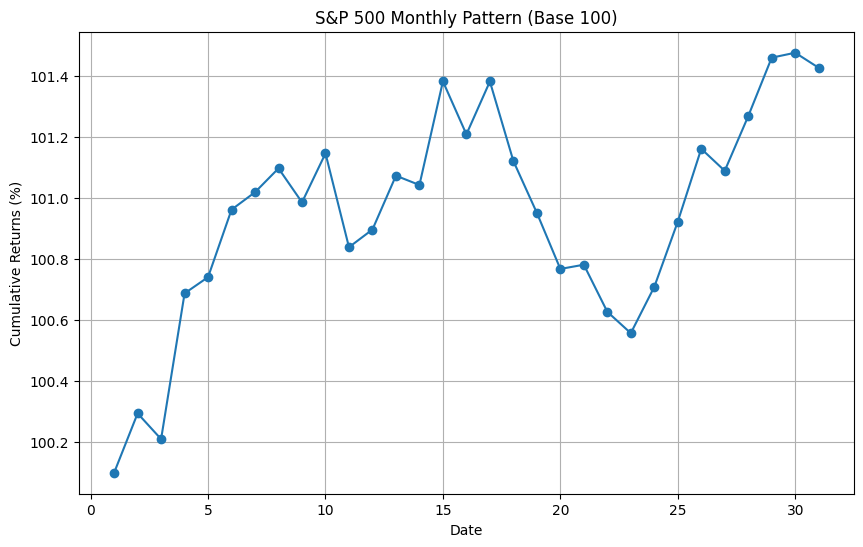

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the S&P 500 ticker symbol and the date range
symbol = "^GSPC"
start_date = "2018-01-01"
end_date = "2023-12-31"

# Download S&P 500 data using Yahoo Finance API
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate the daily returns
daily_returns = data['Adj Close'].pct_change()

_daily = daily_returns.groupby(daily_returns.index.day).mean()
_daily_result = (_daily+1).cumprod()*100

# Plot the data
plt.figure(figsize=(10, 6))
_daily_result.plot(marker='o', ax=plt.gca())
plt.title("S&P 500 Monthly Pattern (Base 100)")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns (%)")
plt.grid(True)
plt.show()

##2.2 년중 일자별 가격 패턴

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


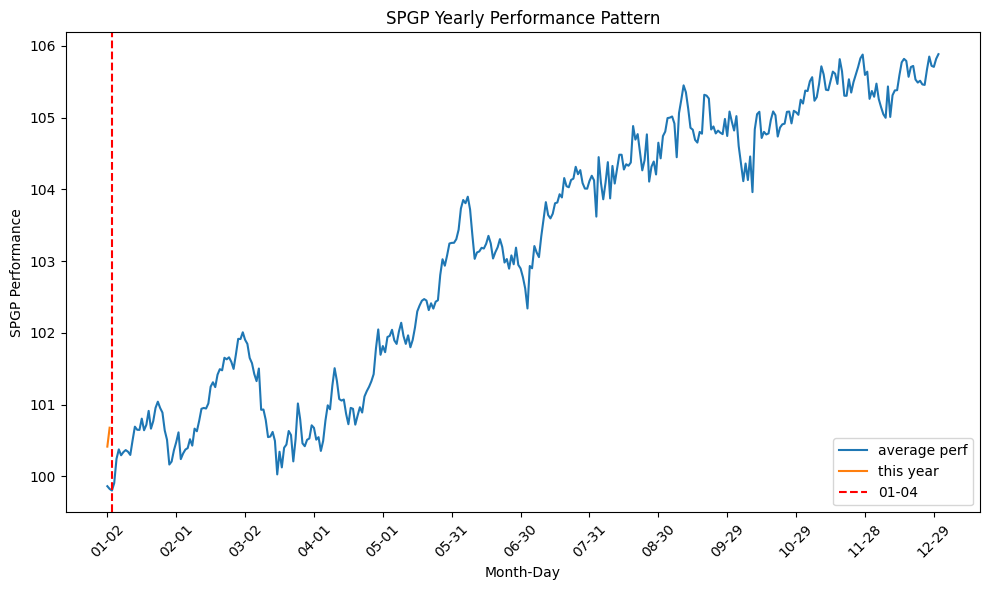

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from datetime import datetime

now = datetime.now() # current date and time

today = now.strftime("%Y-%m-%d")
year = now.year
month = now.month
day = now.day

# ticker & date
ticker = "SPGP" # @param ["MGK","NOBL","SCHD","QDIV","SPGP","COWZ","MOAT","PKW","HAPI"] {allow-input: true}
start_date = "2010-01-01" # @param {type:"date"}
end_date = today

# Download data using Yahoo Finance API
data = yf.download(ticker, start=start_date, end=end_date)

#-------------------------------------------------------------------------------
# for relative performance
bm_checkbox = True # @param {type:"boolean"}
bm_ticker = "^GSPC" # @param {type:"string"}

if bm_checkbox == True:
  sp500 = yf.download(bm_ticker, start=start_date, end=end_date)
  data['Adj Close'] = data['Adj Close']/sp500['Adj Close']
#-------------------------------------------------------------------------------

# Calculate the daily returns
data['Daily_Return'] = data['Adj Close'].pct_change()

# Extract month and day from the index
data['Month'] = data.index.month
data['Day'] = data.index.day

# Group data by month and day and calculate average performance
grouped_performance = data[data.index.year < year].groupby(['Month', 'Day'])['Daily_Return'].mean()
yearly_performance = data[data.index.year == year].copy()

# Reset index for plotting
grouped_performance = grouped_performance.reset_index()
grouped_performance['Cum_Return'] = (1+grouped_performance['Daily_Return']).cumprod() * 100
yearly_performance ['Cum_Return'] = (1+yearly_performance['Daily_Return']).cumprod() * 100


# Plot the grouped performance
plt.figure(figsize=(10, 6))
plt.plot(grouped_performance.index, grouped_performance['Cum_Return'], label = 'average perf')

yearly_idx = [ grouped_performance.index[(grouped_performance['Month'] == row['Month']) & (grouped_performance['Day'] == row['Day'])][0] for index, row in yearly_performance.iterrows()]
plt.plot(yearly_idx, yearly_performance['Cum_Return'], label = 'this year')

plt.title("%s Yearly Performance Pattern" %ticker)
plt.xlabel("Month-Day")
plt.ylabel("%s Performance" %ticker)

# Set xticks to appear once every month
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(
    range(len(grouped_performance))[::30],  # Show every 30th data point
    [f"{month:02d}-{day:02d}" for month, day in zip(grouped_performance['Month'], grouped_performance['Day'])][::30],
    rotation=45,
)

x_idx = grouped_performance.index[(grouped_performance['Month'] == month) & (grouped_performance['Day'] == day)][0]
plt.axvline(x=x_idx, color='red', linestyle='--', label=f'{month:02d}-{day:02d}')

plt.legend()
plt.tight_layout()
plt.show()

##2.3 년중 일자별 상승 확률(과거 데이터 기반)

[*********************100%%**********************]  1 of 1 completed


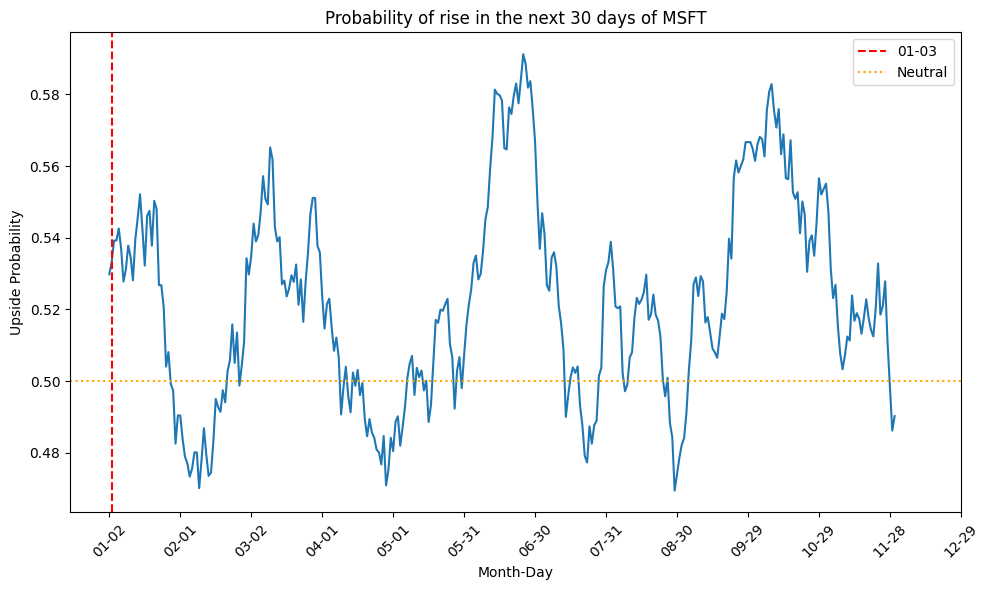

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

now = datetime.now() # current date and time

today = now.strftime("%Y-%m-%d")
year = now.year
month = now.month
day = now.day

# ticker & date
ticker = "MSFT" # @param ["MGK","NOBL","SCHD","QDIV","SPGP","COWZ","MOAT","PKW","HAPI"] {allow-input: true}
start_date = "2010-01-01" # @param {type:"date"}
end_date = today

# Download data using Yahoo Finance API
data = yf.download(ticker, start=start_date, end=end_date)

#-------------------------------------------------------------------------------
# for relative performance
bm_checkbox = False # @param {type:"boolean"}
bm_ticker = "^GSPC" # @param {type:"string"}

if bm_checkbox == True:
  sp500 = yf.download(bm_ticker, start=start_date, end=end_date)
  data['Adj Close'] = data['Adj Close']/sp500['Adj Close']
#-------------------------------------------------------------------------------

data = data[data.index.year < year].copy()

# Calculate the daily returns
data['Daily_Return'] = data['Adj Close'].pct_change()

# Extract month and day from the index
data['Month'] = data.index.month
data['Day'] = data.index.day

# Calculate the probability of a positive daily return for each month-day combination
positive_return_prob = data.groupby(['Month', 'Day'])['Daily_Return'].apply(lambda x: (x > 0).mean())

# Reset index for plotting
positive_return_prob = positive_return_prob.reset_index()

wnd = 30

# Plot the cumulative probability of positive returns
plt.figure(figsize=(10, 6))
plt.plot(positive_return_prob.index, positive_return_prob['Daily_Return'].rolling(wnd).mean().shift(-wnd))
plt.title("Probability of rise in the next 30 days of %s" %ticker)
plt.xlabel("Month-Day")
plt.ylabel("Upside Probability")

# Set xticks to appear once every month
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(
    range(len(positive_return_prob))[::30],  # Show every 30th data point
    [f"{month:02d}-{day:02d}" for month, day in zip(positive_return_prob['Month'], positive_return_prob['Day'])][::30],
    rotation=45,
)

x_idx = positive_return_prob.index[(positive_return_prob['Month'] == month) & (positive_return_prob['Day'] == day)][0]
plt.axvline(x=x_idx, color='red', linestyle='--', label=f'{month:02d}-{day:02d}')

plt.axhline(y=0.5, color='orange', linestyle=':', label='Neutral')

plt.legend()
plt.tight_layout()
plt.show()

##2.4 미국 대통령 선거해의 주가 패턴

[*********************100%%**********************]  1 of 1 completed


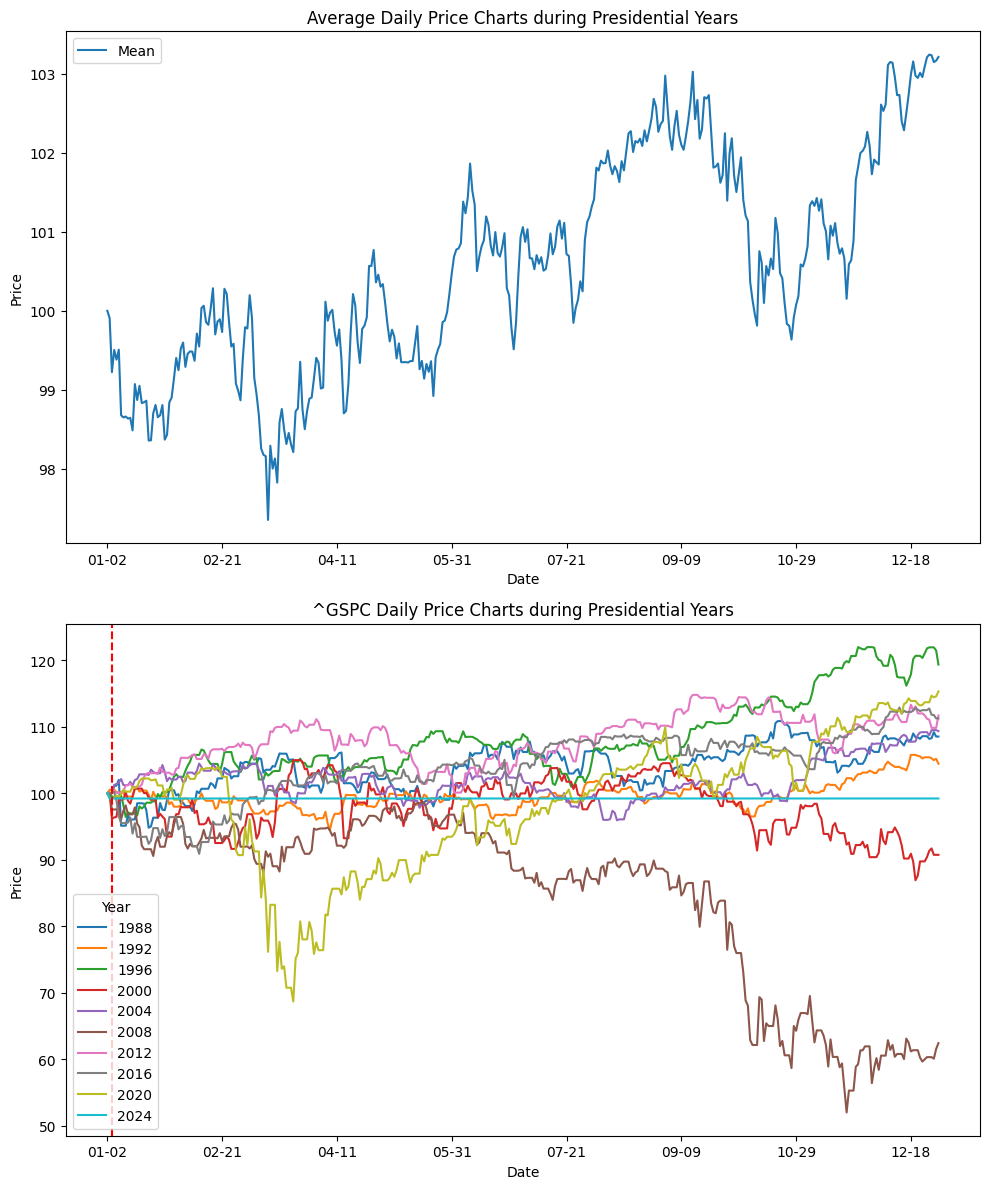

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# Define the range of years you're interested in
start_year = 1985
end_year = 2024  # Make sure to adjust this based on the current year
symbol = '^GSPC'
#symbol = 'LMT'
#symbol = 'OMC'
#symbol = 'IPG'
#symbol = 'META'

# Fetch historical data using yfinance
data = yf.download(symbol, start=f"{start_year}-01-01", end=f"{end_year}-12-31")

# Add a new column to indicate presidential years
# target_years = [2000, 2004, 2008, 2012, 2016, 2020]  # Adjust for the actual years
# data['target_years'] = data.index.year.isin(target_years)

data['target_years'] = (data.index.year % 4 == 0)

data = data[data['target_years']].copy()

# Reset the price to 100 at the beginning of each year
data['Price Reset'] = data.groupby(data.index.year)['Adj Close'].transform('first')
data['Adjusted Price'] = data['Adj Close'] / data['Price Reset'] * 100
data['YearDate'] = data.index.strftime('%m-%d')
data['Year'] = data.index.year

pivot_df = data.pivot (index='YearDate', columns ='Year', values = 'Adjusted Price' )
pivot_df.fillna(method='ffill', inplace=True)
pivot_df.fillna(100, inplace=True)

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Calculate and plot mean and standard deviation on the second subplot
mean_series = pivot_df.mean(axis=1)
std_series = pivot_df.std(axis=1)
upper_bound = mean_series + 1.5 * std_series
lower_bound = mean_series - 1.5 * std_series

mean_series.plot(ax=axes[0], label='Mean')
#upper_bound.plot(ax=axes[0], label='Upper Bound')
#lower_bound.plot(ax=axes[0], label='Lower Bound')

# Plot the adjusted prices on the first subplot
pivot_df.plot(ax=axes[1])

# Add vertical line on today's date
today_date = datetime.now().strftime('%m-%d')
#axes[0].axvline(x=pivot_df.index.get_loc(today_date), color='red', linestyle='--', label='Today')
axes[1].axvline(x=pivot_df.index.get_loc(today_date), color='red', linestyle='--', label='Today')

# Set titles and labels
axes[0].set_title('Average Daily Price Charts during Presidential Years')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')
axes[0].legend()

axes[1].set_title('%s Daily Price Charts during Presidential Years' % symbol)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price')

# Adjust layout and display
plt.tight_layout()
plt.show()

#3. Facebook의 prophet을 이용한 시계열 패턴 찾기

[*********************100%%**********************]  1 of 1 completed

DEBUG:cmdstanpy:input tempfile: /tmp/tmp29dlrrzf/obfnadge.json



140


DEBUG:cmdstanpy:input tempfile: /tmp/tmp29dlrrzf/twerxyfg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51299', 'data', 'file=/tmp/tmp29dlrrzf/obfnadge.json', 'init=/tmp/tmp29dlrrzf/twerxyfg.json', 'output', 'file=/tmp/tmp29dlrrzf/prophet_model3jnky9al/prophet_model-20230822020842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:08:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:08:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


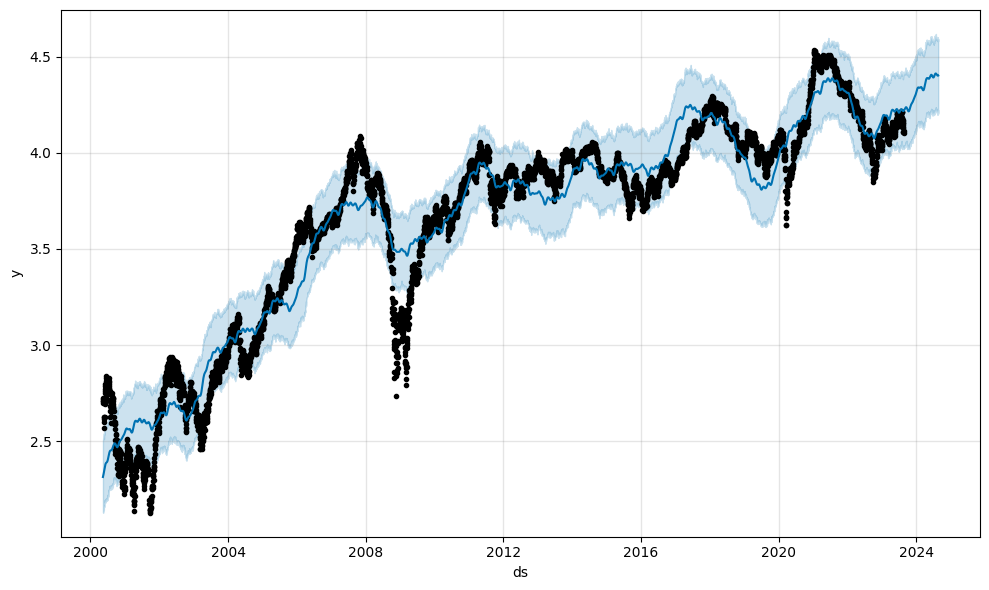

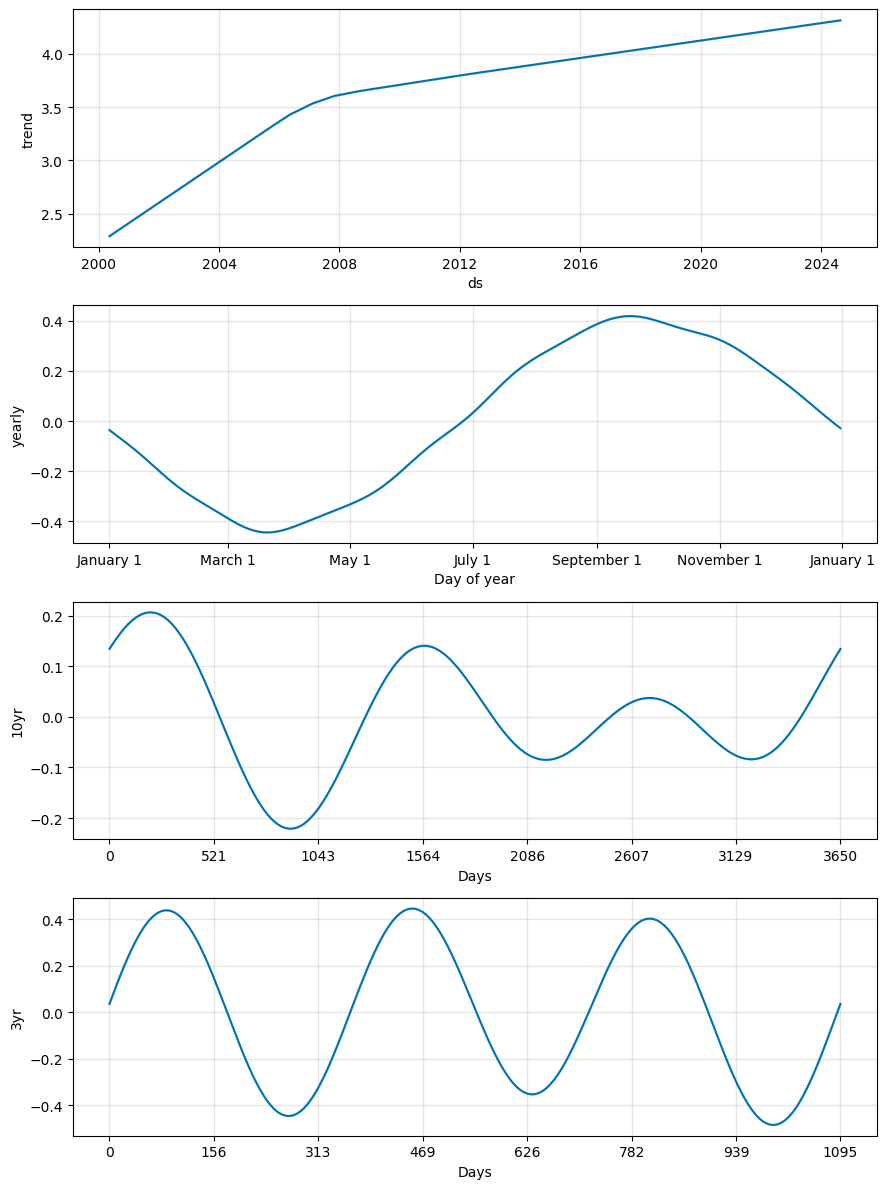

In [ ]:
!pip install -q yfinance prophet matplotlib

import pandas as pd
import yfinance as yf
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np

# Fetch historical stock price data using yfinance
start_date = '1985-01-01'
end_date = '2023-12-31'
data = yf.download('EWY', start=start_date, end=end_date)

# Prepare the data for Prophet
data = data.reset_index()
data.rename(columns={'Date': 'ds', 'Adj Close': 'y'}, inplace=True)
data['y'] = data['y'].apply(np.log)

# Create a Prophet model with seasonality
#model = Prophet(daily_seasonality=True, yearly_seasonality=True, weekly_seasonality=True)
model = Prophet(growth='linear', changepoint_prior_scale=0.001, yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)

# Add additional custom seasonality patterns if necessary
model.add_seasonality(name='3yr', period=365*3, fourier_order=3)
model.add_seasonality(name='10yr', period=365*10, fourier_order=3)

#print (data.index.values[-1] % 365*3)
print (data.index.values[-1] % 365*10)

# Fit the model to the data
model.fit(data)

# Create a future dataframe for plotting seasonality
future = model.make_future_dataframe(periods=365)  # Extend for visualization

# Make predictions using the model
forecast = model.predict(future)

# Plot the components of the forecasted results
fig = model.plot(forecast)
fig = model.plot_components(forecast)

plt.show()

[*********************100%%**********************]  1 of 1 completed

DEBUG:cmdstanpy:input tempfile: /tmp/tmp29dlrrzf/_yh2rj72.json


DEBUG:cmdstanpy:input tempfile: /tmp/tmp29dlrrzf/qwaycknu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19512', 'data', 'file=/tmp/tmp29dlrrzf/_yh2rj72.json', 'init=/tmp/tmp29dlrrzf/qwaycknu.json', 'output', 'file=/tmp/tmp29dlrrzf/prophet_modelz5dt7864/prophet_model-20230822024542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:45:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:45:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp29dlrrzf/rujs36r4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp29dlrrzf/fhrknmia.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

Best Parameters:
{'changepoint_prior_scale': 0.001, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}
Lowest MSE: 0.04447727659002452


DEBUG:cmdstanpy:input tempfile: /tmp/tmp29dlrrzf/byyx73_a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34557', 'data', 'file=/tmp/tmp29dlrrzf/bzb1x6tk.json', 'init=/tmp/tmp29dlrrzf/byyx73_a.json', 'output', 'file=/tmp/tmp29dlrrzf/prophet_modelgvwwd4xb/prophet_model-20230822024630.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:46:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:46:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


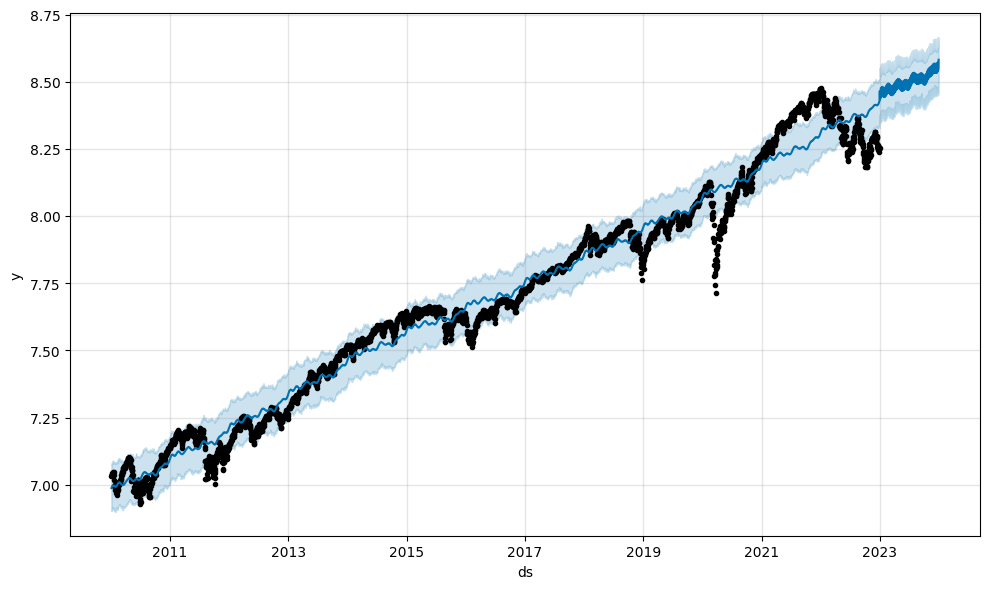

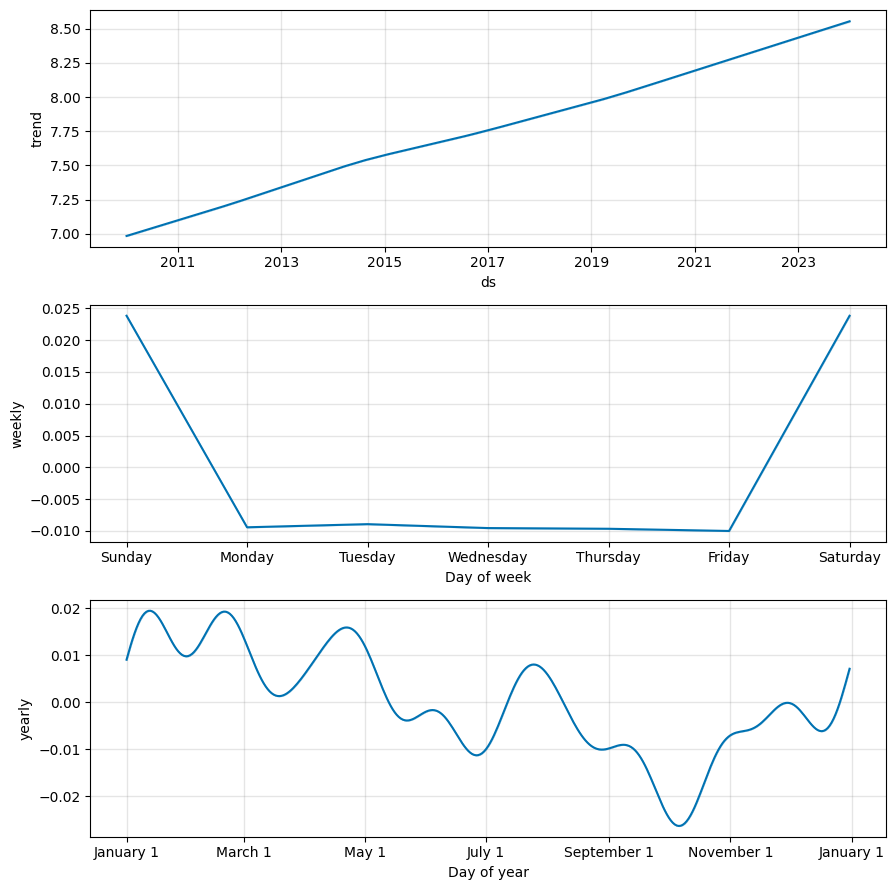

In [ ]:
!pip install -q yfinance prophet matplotlib

import yfinance as yf
from prophet import Prophet
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid
import logging

# Suppress fbprophet debug messages
logging.getLogger('fbprophet').setLevel(logging.WARNING)

# Download Apple stock price data using yfinance
start_date = '2010-01-01'
end_date = '2023-01-01'
apple_data = yf.download('^GSPC', start=start_date, end=end_date)

# Prepare the data for fbprophet
data = apple_data.reset_index()[['Date', 'Adj Close']]
data.rename(columns={'Date': 'ds', 'Adj Close': 'y'}, inplace=True)
data['y'] = data['y'].apply(np.log)

# Split the data into training and testing sets
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

# Define a function to evaluate the model
def evaluate_model(params):
    model = Prophet(growth = 'linear', daily_seasonality=False, **params)
    model.fit(train_data)
    future = model.make_future_dataframe(periods=len(test_data))
    forecast = model.predict(future)
    mse = mean_squared_error(test_data['y'], forecast['yhat'][-len(test_data):])
    return mse

# Define a grid of parameters to search
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1],
    'seasonality_prior_scale': [0.01, 0.1, 1.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Initialize variables for best parameters and lowest MSE
best_params = None
lowest_mse = np.inf

# Loop through the parameter grid and evaluate models
for params in ParameterGrid(param_grid):
    mse = evaluate_model(params)
    if mse < lowest_mse:
        lowest_mse = mse
        best_params = params

print("Best Parameters:")
print(best_params)
print("Lowest MSE:", lowest_mse)

best_model = Prophet (growth = 'linear', daily_seasonality=False, **best_params)
# Fit the model to the data
best_model.fit(data)

# Create a future dataframe for plotting seasonality
future = best_model.make_future_dataframe(periods=365)  # Extend for visualization

# Make predictions using the model
forecast = best_model.predict(future)

# Plot the components of the forecasted results
fig = best_model.plot(forecast)
fig = best_model.plot_components(forecast)

plt.show()

#4 Macro Variables and Market Performance

##4.1 Yield Curve

[*********************100%%**********************]  1 of 1 completed


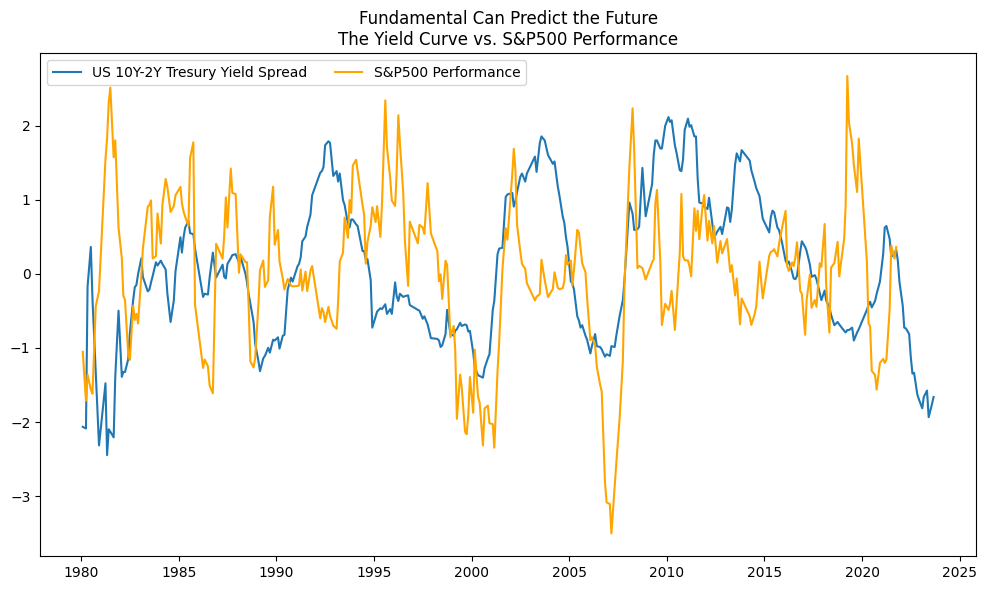

In [ ]:
!pip install fredapi
from fredapi import Fred
import yfinance as yf
import matplotlib.pyplot as plt

# Replace 'YOUR_API_KEY' with your actual FRED API key
api_key = '2f1251d60ba91ebf830cfd41345dcfd2'
fred = Fred(api_key=api_key)

# Series IDs for 10-year and 30-year Treasury rates
two_year_rate_id = 'GS2'  # 10-year constant maturity rate
ten_year_rate_id = 'GS10'  # 10-year constant maturity rate

# Fetch data
two_year_data = fred.get_series(two_year_rate_id)
ten_year_data = fred.get_series(ten_year_rate_id)

# Combine data into a DataFrame
import pandas as pd

data = pd.DataFrame({
    '2y yield': two_year_data,
    '10y yield': ten_year_data,
})

data['spread'] = data['10y yield'] - data['2y yield']
data['Normalized spread'] = (data['spread'] - data['spread'].mean()) / data['spread'].std()

start_year = 1980
end_year = 2030

# Fetch S&P 500 historical data using yfinance
sp500 = yf.download('^GSPC', start=f"{start_year}-01-01", end=f"{end_year}-12-31")
sp500['perf'] = sp500['Adj Close'].pct_change(252) * 100
sp500['Normalized perf'] = (sp500['perf'] - sp500['perf'].mean()) / sp500['perf'].std()
sp500['Normalized perf'] = sp500['Normalized perf'].shift(-252*2)

# Merge S&P 500 and yield data on the common 'Date' index
merged_data = data.merge(sp500, left_index=True, right_index=True)

# Plot the comparison
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.title('Fundamental Can Predict the Future\nThe Yield Curve vs. S&P500 Performance')

ax1.plot(merged_data.index, merged_data['Normalized spread'], label='US 10Y-2Y Tresury Yield Spread')
#ax2 = ax1.twinx()
ax1.plot(merged_data.index, merged_data['Normalized perf'], color='orange', label='S&P500 Performance')

plt.legend(loc='best', ncol=2)
plt.tight_layout()
plt.show()

##4.2 CPI

[*********************100%%**********************]  1 of 1 completed
            CPIAUCNS
DATE                
2023-05-01  4.047609
2023-06-01  2.969178
2023-07-01  3.177780
2023-08-01  3.665112
2023-09-01  3.699698


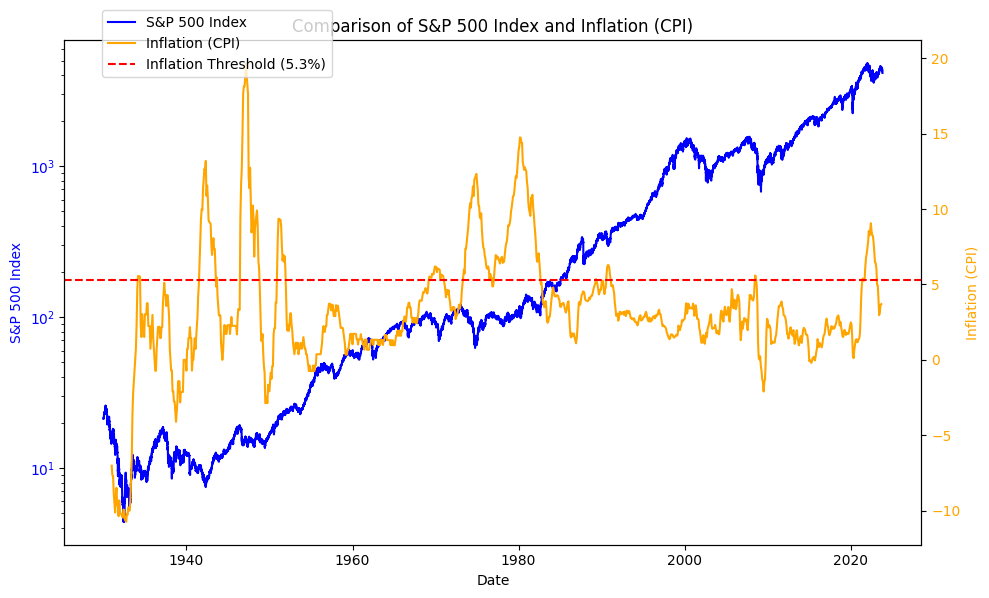

In [ ]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt

# Set the start and end dates for the data
start_date = '1930-01-01'
end_date = '2023-12-31'

# Fetch S&P 500 data using yfinance
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)

# Fetch inflation data (CPI) from FRED using pandas_datareader
cpi_data = pdr.DataReader('CPIAUCNS', 'fred', start=start_date, end=end_date).pct_change(periods=12) * 100

print (cpi_data.tail())

# Create a figure and two axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot S&P 500 data on the first y-axis (left)
ax1.plot(sp500_data.index, sp500_data['Adj Close'], color='blue', label='S&P 500 Index')
ax1.set_yscale('log')
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500 Index', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a twin y-axis for inflation data (right)
ax2 = ax1.twinx()
ax2.plot(cpi_data.index, cpi_data['CPIAUCNS'], color='orange', label='Inflation (CPI)')
ax2.set_ylabel('Inflation (CPI)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.axhline(y=5.3, color='red', linestyle='--', label='Inflation Threshold (5.3%)')

# Set title and legend
plt.title('Comparison of S&P 500 Index and Inflation (CPI)')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 1))

plt.show()

[*********************100%%**********************]  1 of 1 completed
            CPIAUCNS  Inflation
DATE                           
2023-05-01   304.127   4.047609
2023-06-01   305.109   2.969178
2023-07-01   305.691   3.177780
2023-08-01   307.026   3.665112
2023-09-01   307.789   3.699698


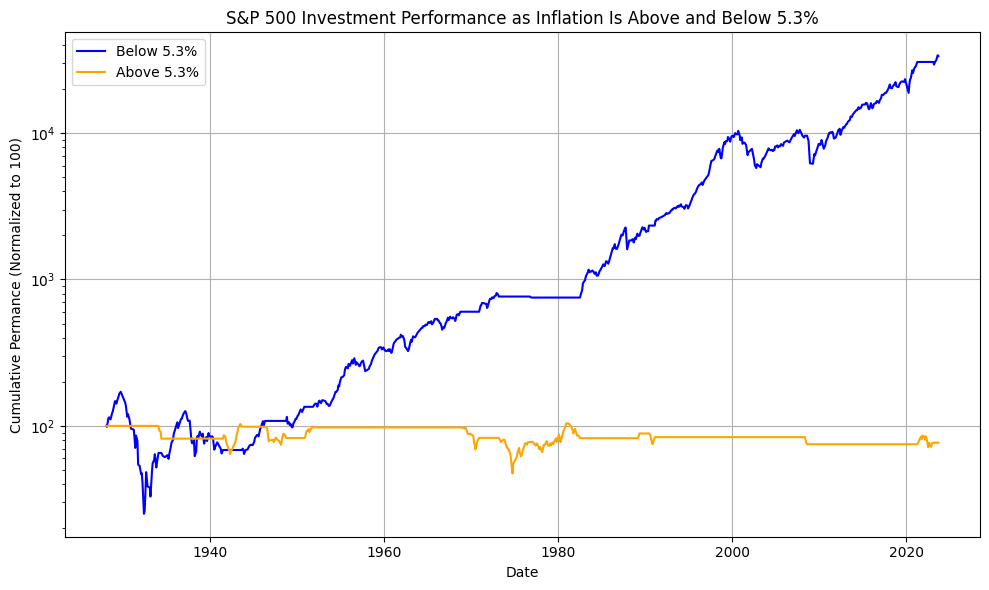

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

# Set the start and end dates for the data
start_date = '1900-01-01'
end_date = '2023-12-31'

# Fetch S&P 500 data from Yahoo Finance using yfinance
import yfinance as yf
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)

# Fetch inflation data (CPI) from FRED using pandas_datareader
cpi_data = pdr.DataReader('CPIAUCNS', 'fred', start_date, end_date)

# Calculate annual inflation rates
cpi_data['Inflation'] = cpi_data['CPIAUCNS'].pct_change(periods=12) * 100

# Define the threshold inflation rate (5.3%)
threshold_inflation = 5.3

# Merge S&P 500 and inflation data based on date
merged_data = pd.merge(sp500_data, cpi_data, left_index=True, right_index=True, how='inner')
merged_data['ret'] = merged_data['Adj Close'].pct_change()


# Separate data for inflation less than 5.3% and inflation above 5.3%

merged_data['low_inflation'] = merged_data[merged_data['Inflation'] < threshold_inflation]['ret']
merged_data['high_inflation'] = merged_data[merged_data['Inflation'] >= threshold_inflation]['ret']

merged_data['low_inflation'].fillna(0,inplace = True)
merged_data['high_inflation'].fillna(0,inplace = True)

merged_data['low_inf_perf'] = (1.0 + merged_data['low_inflation']).cumprod() * 100
merged_data['high_inf_perf'] = (1.0 + merged_data['high_inflation']).cumprod() * 100

# Plot the comparison of investment performance
plt.figure(figsize=(10, 6))
plt.plot(merged_data.index, merged_data['low_inf_perf'], label='Below 5.3%', color='blue')
plt.plot(merged_data.index, merged_data['high_inf_perf'], label='Above 5.3%', color='orange')
plt.yscale('log')
plt.title('S&P 500 Investment Performance as Inflation Is Above and Below 5.3%')
plt.xlabel('Date')
plt.ylabel('Cumulative Permance (Normalized to 100)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

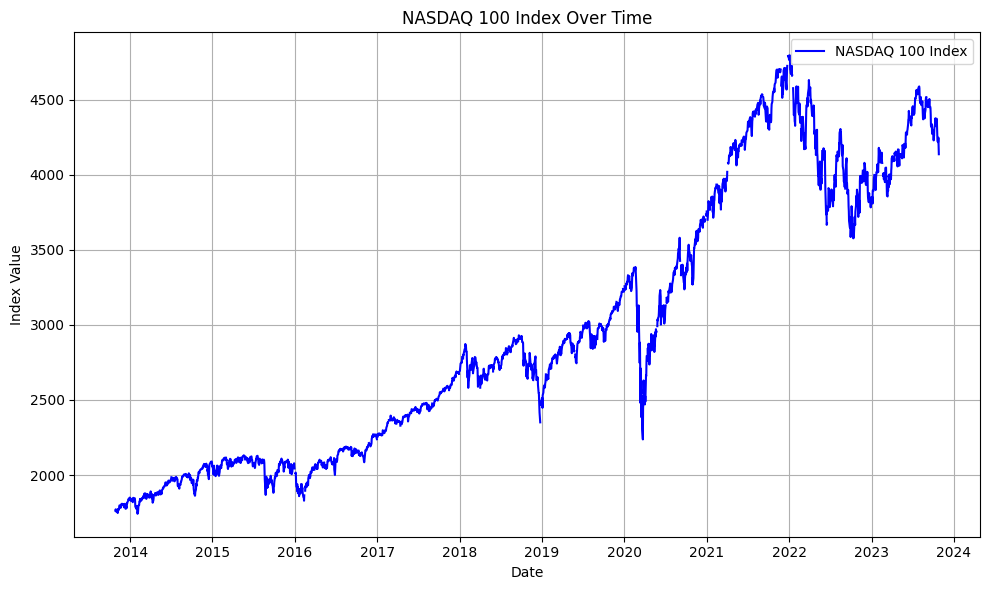

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

# Set the start and end dates for the data
start_date = '1960-01-01'
end_date = '2023-12-31'

# Fetch NASDAQ Composite Index data from FRED using pandas_datareader
# NASDAQ Composite Index: NASDAQCOM
# NASDAQ 100 Index (NASDAQ100)
nasdaq_data = pdr.DataReader('SP500', 'fred', start_date, end_date)

# Plot the NASDAQ Composite Index data
plt.figure(figsize=(10, 6))
plt.plot(nasdaq_data.index, nasdaq_data['SP500'], color='blue', label='NASDAQ 100 Index')
plt.title('NASDAQ 100 Index Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##4.3 Average Hourly Earnings and Fed Funds Rate

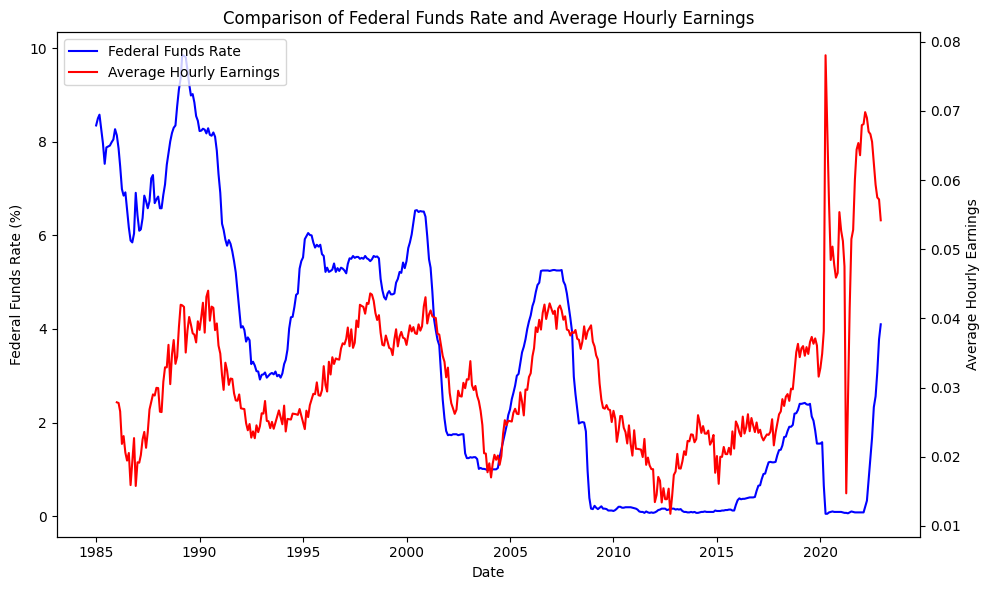

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

# Set the start and end dates for the data
start_date = '1985-01-01'
end_date = '2022-12-31'

# Fetch Federal Funds Rate data from FRED using pandas_datareader
fed_funds_rate_data = pdr.DataReader('FEDFUNDS', 'fred', start_date, end_date)

# Fetch Average Hourly Earnings data from FRED using pandas_datareader
hourly_earnings_data = pdr.DataReader('AHETPI', 'fred', start_date, end_date)

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # Create a twin axes sharing the same x-axis

# Plot Federal Funds Rate on the first axis
ax1.plot(fed_funds_rate_data.index, fed_funds_rate_data['FEDFUNDS'], color='blue', label='Federal Funds Rate')
ax1.set_ylabel('Federal Funds Rate (%)')

# Plot Average Hourly Earnings on the second axis
ax2.plot(hourly_earnings_data.index, hourly_earnings_data['AHETPI'].pct_change(periods=12), color='red', label='Average Hourly Earnings')
ax2.set_ylabel('Average Hourly Earnings')

# Set labels and title
ax1.set_xlabel('Date')
ax1.set_title('Comparison of Federal Funds Rate and Average Hourly Earnings')

# Combine the legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()
